# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

Here, we will use Pandas to directly read data from Yahoo.

In [188]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
%matplotlib inline

## Data

We will use pandas datareader to get the stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** We will get the data for all the banks from Jan 1st 2006 to Jan 1st 2016 mentioned above using datareader.**

** We will need Bank's [Ticker Symbols](https://topforeignstocks.com/stock-lists/the-complete-list-of-bank-stocks-trading-on-the-nyse-2/) for this. **

In [189]:
start = datetime(2006,1,1)

In [190]:
end = datetime(2016,1,1)

In [191]:
BOA = data.DataReader("BAC", 'yahoo', start, end)
Citi = data.DataReader("C",'yahoo', start, end)
GS = data.DataReader("GS",'yahoo', start, end)
JPM = data.DataReader("JPM",'yahoo', start, end)
MS = data.DataReader("MS",'yahoo', start, end)
WF = data.DataReader("WF",'yahoo', start, end)

** Creating a list of tickers **

In [111]:
tickers = ['BAC','C','GS','JPM','MS','WF']

** We will create a single data frame for all the banks **

In [112]:
bank_stocks = pd.concat([BOA, Citi, GS, JPM, MS, WF],axis =1,keys=tickers)
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.717861   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.338535   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.384048   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.330940   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.353695   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  16.159273   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  16.028276   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  16.168636   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.953424   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.747576   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                    WF                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.292645  73.766388  72.228844  72.705605   
2006-01-04  58.349998  7977800.0  38.318924  74.719902  72.884384  73.122765   
2006-01-05  58.509998  5778000.0  38.423988  73.420738  72.526817  73.003578   
2006-01-06  58.570000  6889800.0  38.463394  76.769966  73.897499  73.897499   
2006-01-09  59.189999  4144500.0  38.870537  75.268173  74.195473  74.493446   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  29.787905  23.639999  23.450001  23.450001   
2015-12-28  32.169998  5420300.0  29.503603  23.670000  23.450001  23.510000   
2015-12-29  32.549999  6388200.0  29.852108  23.010000  22.879999  23.010000   
2015-12-30  32.230000  5057200.0  29.558628  22.590000  22.430000  22.590000   
2015-12-31  31.809999  8154300.0  29.173445  22.600000  22.430000  22.549999   

                                           
                Close   Volume  Adj Close  
Date                                       
2006-01-03  72.884384  23400.0  58.224350  
2006-01-04  74.016685  27200.0  59.128902  
2006-01-05  72.669846  11000.0  58.052959  
2006-01-06  75.744934  34800.0  60.509521  
2006-01-09  74.195473  30900.0  59.271729  
...               ...      ...        ...  
2015-12-24  23.639999   1400.0  21.465391  
2015-12-28  23.670000   1500.0  21.492634  
2015-12-29  22.940001   3000.0  21.418379  
2015-12-30  22.520000   2100.0  21.026237  
2015-12-31  22.600000   5900.0  21.100931  

[2517 rows x 36 columns]

In [192]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24   17.379999  17.219999  17.320000  17.270000  29369400.0   
2015-12-28   17.230000  16.980000  17.219999  17.129999  41777500.0   
2015-12-29   17.350000  17.160000  17.250000  17.280001  45670400.0   
2015-12-30   17.240000  17.040001  17.200001  17.049999  35066400.0   
2015-12-31   17.070000  16.830000  17.010000  16.830000  47153000.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2015-12-24   16.159273   52.970001   52.450001   52.480000   52.709999  ...   
2015-12-28   16.028276   52.570000   51.959999   52.570000   52.380001  ...   
2015-12-29   16.168636   53.220001   52.740002   52.759998   52.980000  ...   
2015-12-30   15.953424   52.939999   52.250000   52.840000   52.299999  ...   
2015-12-31   15.747576   52.389999   51.750000   52.070000   51.750000  ...   

Bank Ticker         MS                                          WF             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.292645  73.766388  72.228844   
2006-01-04   58.700001  58.349998  7977800.0  38.318924  74.719902  72.884384   
2006-01-05   58.549999  58.509998  5778000.0  38.423988  73.420738  72.526817   
2006-01-06   58.770000  58.570000  6889800.0  38.463394  76.769966  73.897499   
2006-01-09   58.630001  59.189999  4144500.0  38.870537  75.268173  74.195473   
...                ...        ...        ...        ...        ...        ...   
2015-12-24   32.570000  32.480000  2798200.0  29.787905  23.639999  23.450001   
2015-12-28   32.360001  32.169998  5420300.0  29.503603  23.670000  23.450001   
2015-12-29   32.439999  32.549999  6388200.0  29.852108  23.010000  22.879999   
2015-12-30   32.500000  32.230000  5057200.0  29.558628  22.590000  22.430000   
2015-12-31   31.910000  31.809999  8154300.0  29.173445  22.600000  22.430000   

Bank Ticker                                            
Stock Info        Open      Close   Volume  Adj Close  
Date                                                   
2006-01-03   72.705605  72.884384  23400.0  58.224350  
2006-01-04   73.122765  74.016685  27200.0  59.128902  
2006-01-05   73.003578  72.669846  11000.0  58.052959  
2006-01-06   73.897499  75.744934  34800.0  60.509521  
2006-01-09   74.493446  74.195473  30900.0  59.271729  
...                ...        ...      ...        ...  
2015-12-24   23.450001  23.639999   1400.0  21.465391  
2015-12-28   23.510000  23.670000   1500.0  21.492634  
2015-12-29   23.010000  22.940001   3000.0  21.418379  
2015-12-30   22.590000  22.520000   2100.0  21.026237  
2015-12-31   22.549999  22.600000  

In [193]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                          WF             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.292645  73.766388  72.228844   
2006-01-04   58.700001  58.349998  7977800.0  38.318924  74.719902  72.884384   
2006-01-05   58.549999  58.509998  5778000.0  38.423988  73.420738  72.526817   
2006-01-06   58.770000  58.570000  6889800.0  38.463394  76.769966  73.897499   
2006-01-09   58.630001  59.189999  4144500.0  38.870537  75.268173  74.195473   

Bank Ticker                                            
Stock Info        Open      Close   Volume  Adj Close  
Date                                                   
2006-01-03   72.705605  72.884384  23400.0  58.224350  
2006-01-04   73.122765  74.016685  27200.0  59.128902  
2006-01-05   73.003578  72.669846  11000.0  58.052959  
2006-01-06   73.897499  75.744934  34800.0  60.509521  
2006-01-09   74.493446  74.195473  30900.0  59.271729  

[5 rows x 36 columns]

** We will now explore some key data**
** Max Close price for each bank's stock throughout the time period?**

In [194]:
bank_stocks.xs(key='Close', axis =1,level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WF      99.868889
dtype: float64

** Creating a new dataframe called "returns" that will contain the returns for each bank's stock. **

In [196]:
returns = pd.DataFrame()

In [210]:
for ticker in tickers:
    returns[ticker+" Return"] = bank_stocks[ticker]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.020456


** Creating a pairplot using seaborn of the returns dataframe to see which stock stands out **

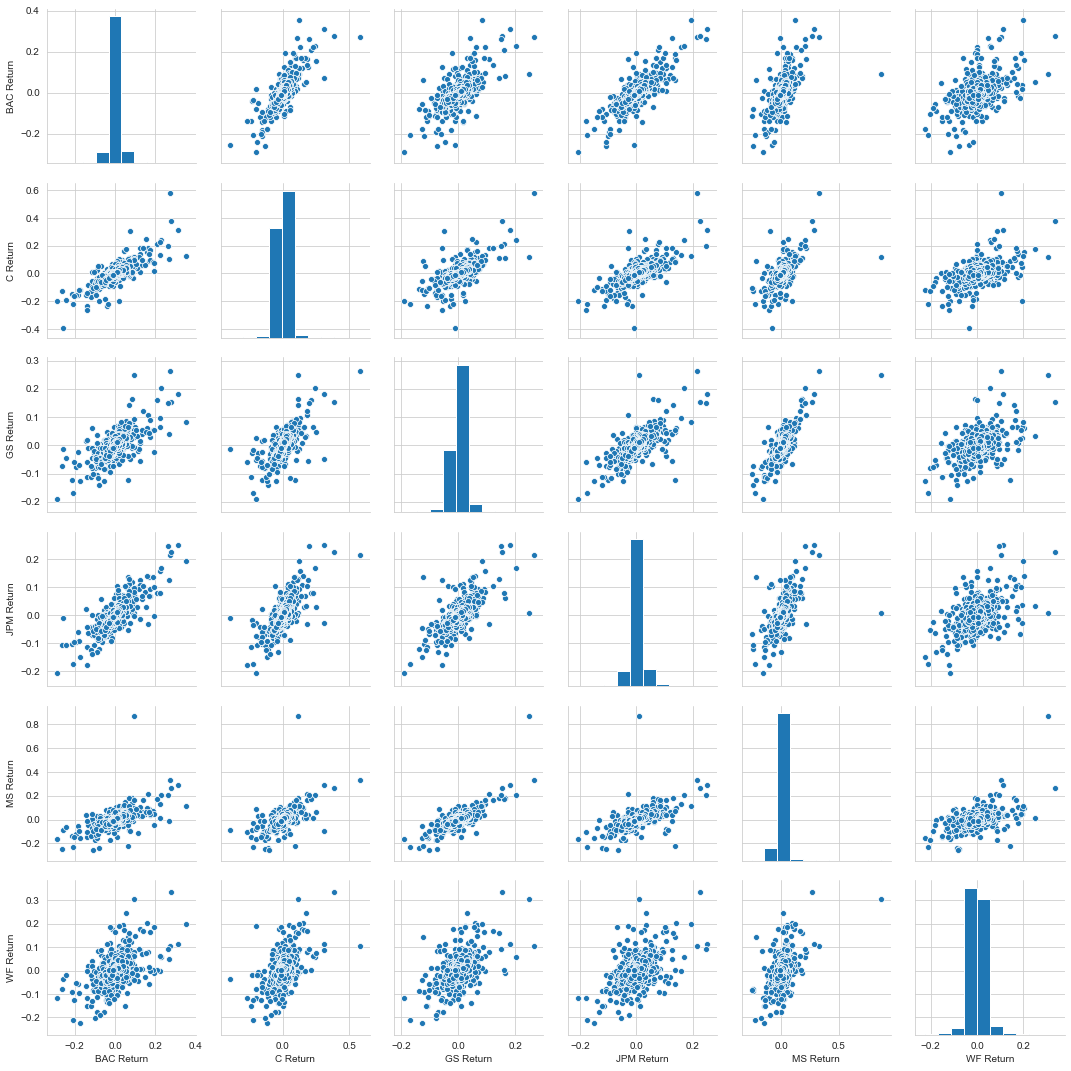

In [198]:
sns.pairplot(returns[1:])

** We can even figure out on what dates each bank stock had the best and worst single day returns. **

In [199]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2008-09-29
dtype: datetime64[ns]

In [200]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WF Return    2009-03-10
dtype: datetime64[ns]

** As we can notice, three of the Banks had their largest drop on the same day**

** Also, JPM's largest drop and biggest gain were very close to each other. And same was the case with Morgan Stanley. We can go ahead to investigate if there was anything specific to these banks **

** We can use standard deviation to classify the stock which was the riskiest over the entire time frame **

In [201]:
returns.std() #CitiGroup stock is the riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WF Return     0.035348
dtype: float64

In [203]:
returns.loc['2015-01-01':'2015-12-31'].std() # Wells Fargo stock were the riskiest in 2015.

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WF Return     0.022002
dtype: float64

** Some more visualizations to see if there is anything specific we can come up with. **

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

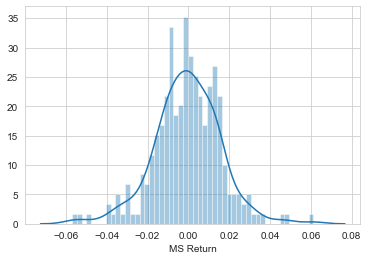

In [204]:
sns.set_style('whitegrid')
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins = 50)

** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

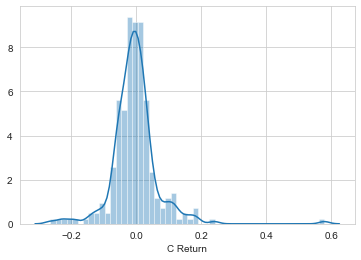

In [205]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins = 50)

## We can also use Plotly and Cufflinks, for iplots.

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24   17.379999  17.219999  17.320000  17.270000  29369400.0   
2015-12-28   17.230000  16.980000  17.219999  17.129999  41777500.0   
2015-12-29   17.350000  17.160000  17.250000  17.280001  45670400.0   
2015-12-30   17.240000  17.040001  17.200001  17.049999  35066400.0   
2015-12-31   17.070000  16.830000  17.010000  16.830000  47153000.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2015-12-24   16.159273   52.970001   52.450001   52.480000   52.709999  ...   
2015-12-28   16.028276   52.570000   51.959999   52.570000   52.380001  ...   
2015-12-29   16.168636   53.220001   52.740002   52.759998   52.980000  ...   
2015-12-30   15.953424   52.939999   52.250000   52.840000   52.299999  ...   
2015-12-31   15.747576   52.389999   51.750000   52.070000   51.750000  ...   

Bank Ticker         MS                                          WF             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.292645  73.766388  72.228844   
2006-01-04   58.700001  58.349998  7977800.0  38.318924  74.719902  72.884384   
2006-01-05   58.549999  58.509998  5778000.0  38.423988  73.420738  72.526817   
2006-01-06   58.770000  58.570000  6889800.0  38.463394  76.769966  73.897499   
2006-01-09   58.630001  59.189999  4144500.0  38.870537  75.268173  74.195473   
...                ...        ...        ...        ...        ...        ...   
2015-12-24   32.570000  32.480000  2798200.0  29.787905  23.639999  23.450001   
2015-12-28   32.360001  32.169998  5420300.0  29.503603  23.670000  23.450001   
2015-12-29   32.439999  32.549999  6388200.0  29.852108  23.010000  22.879999   
2015-12-30   32.500000  32.230000  5057200.0  29.558628  22.590000  22.430000   
2015-12-31   31.910000  31.809999  8154300.0  29.173445  22.600000  22.430000   

Bank Ticker                                            
Stock Info        Open      Close   Volume  Adj Close  
Date                                                   
2006-01-03   72.705605  72.884384  23400.0  58.224350  
2006-01-04   73.122765  74.016685  27200.0  59.128902  
2006-01-05   73.003578  72.669846  11000.0  58.052959  
2006-01-06   73.897499  75.744934  34800.0  60.509521  
2006-01-09   74.493446  74.195473  30900.0  59.271729  
...                ...        ...      ...        ...  
2015-12-24   23.450001  23.639999   1400.0  21.465391  
2015-12-28   23.510000  23.670000   1500.0  21.492634  
2015-12-29   23.010000  22.940001   3000.0  21.418379  
2015-12-30   22.590000  22.520000   2100.0  21.026237  
2015-12-31   22.549999  22.600000  

** Creating a line plot showing Close price for each bank for the entire index of time.**

In [241]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').iplot()

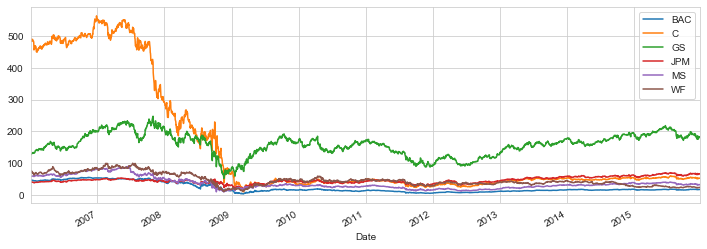

In [130]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

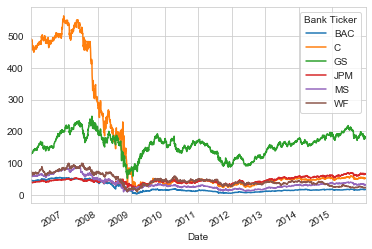

In [133]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

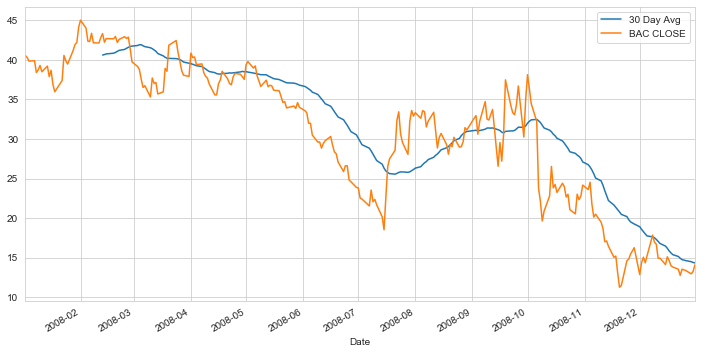

In [242]:
plt.figure(figsize=(12,6))
bank_stocks.xs(key='Close',axis=1,level='Stock Info')['BAC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks.xs(key='Close',axis=1,level='Stock Info')['BAC'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Creating a heatmap of the correlation between the stocks Close Price.**

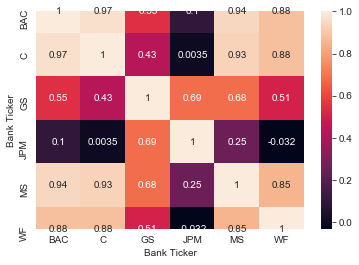

In [243]:
sns.heatmap(bank_stocks.xs(key='Close', axis =1, level='Stock Info').corr(), annot = True)

In [167]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [244]:
boaDf = bank_stocks['2015-01-01':'2016-01-01']['BAC']
boaDf
boaDf.iplot(kind = 'candle')

In [183]:
msDf = bank_stocks['2015-01-01':'2015-12-31']['MS']['Close']
msDf.ta_plot(study = 'sma')

** Creating a Bollinger Band Plot for Bank of America for the year 2015.**

In [187]:
boaDf.ta_plot(study = 'boll')

## END